## TSF Data Science & Business Analytics Task 3
__Author - Akash Yadav<br>__
__#GRIPJUNE21<br>__
__Dataset :__ __[
SampleSuperstore.csv](https://bit.ly/3i4rbWl)__
#### Exploratory Data Analysis - Retail
The goal is to analyse Retail Sales and Profit on the basis of :
* [Category](#category)
* [Sub-Category](#sub)
* [Segment](#segment)
* [Ship Mode](#ship)
* [Quantity](#quantity)
* [Discount](#discount)<br>
and to observe the weak areas and come up with solutions for improving these areas.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
data = pd.read_csv("./SampleSuperstore.csv")

In [23]:
plt.style.use("fivethirtyeight")

In [24]:
data.shape

(9994, 13)

In [25]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [27]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [28]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

##### Dropping column Country as it contains only one country i.e. United States

In [29]:
data.drop(["Country"], axis=1);

## Augmenting Data

In [30]:
for city in data.City.unique()[:20]:
    st = data[data.City==city].State.unique()
    if len(st)>1:
        print(f"{city} : {st}")

Henderson : ['Kentucky' 'Nevada']
Concord : ['North Carolina' 'California' 'New Hampshire']
Dover : ['Delaware' 'New Hampshire']


##### Here we can see that some city names appear in two or more states. Therefore an Address column is added which contains both the city and state for better understanding.

In [31]:
data["Address"] = data.City +" "+ data.State

In [32]:
def draw(dataset, col, rotation):
    figure, axis = plt.subplots(1, 4, figsize=(19, 9))
    s1 = sns.barplot(ax=axis[1], x=dataset.index, y=dataset.Quantity)
    s1.set_xticklabels(s1.get_xticklabels(), rotation=rotation)
    s1.set(title="Quantity")
    s2 = sns.barplot(ax=axis[2], x=dataset.index, y=dataset.Sales)
    s2.set_xticklabels(s1.get_xticklabels(), rotation=rotation)
    s2.set(title="Sales")
    s3 = sns.barplot(ax=axis[3], x=dataset.index, y=dataset.Profit)
    s3.set_xticklabels(s1.get_xticklabels(), rotation=rotation)
    s3.set(title="Profit")
    s4 = sns.countplot(ax=axis[0], x=col, data=data)
    s4.set_xticklabels(s1.get_xticklabels(), rotation=rotation)
    s4.set(title="No. of Orders", ylabel="Order Count")
    figure.tight_layout()

## <div id="category">1. Category<div> 

In [33]:
cat = data.groupby(["Category"])[["Quantity", "Sales", "Profit"]].sum()

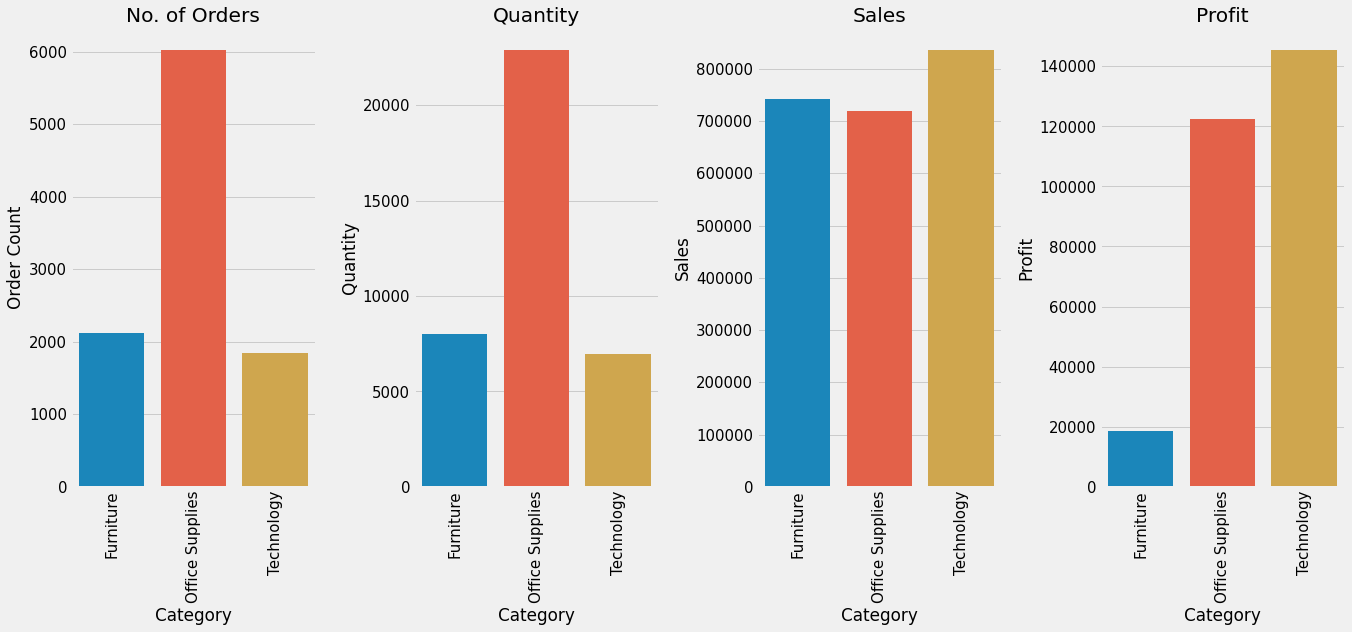

In [34]:
draw(cat, "Category", 90)

### Observations :
* Sales of each category is approx. same
* Quantity of Office Supplies sold is a lot greater than other two but still it produces the same Sales result which shows that office supplies are relatively cheaper.
* Even though furniture produce sales equal to other two categories, it is the least profitable product category.
* Products in Technology category makes the most profit 

## <div id="sub">2. Sub-Category<div/> 

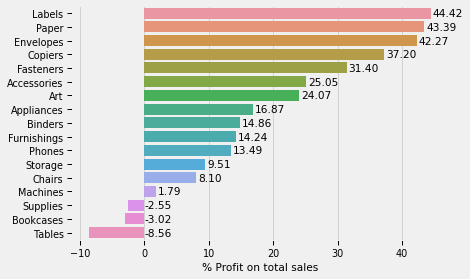

In [35]:
c = "Sub-Category"
sub_category = data[c].unique()
profits = []
for val in sub_category:
    sales = data[data[c]==val].Sales.sum()
    profit = data[data[c]==val].Profit.sum()
    profits.append((profit/sales*100, val))
profits.sort(reverse=True)
sns.set_context("paper", font_scale=1.1)
splot = sns.barplot(x=[i[0] for i in profits], y=[i[1] for i in profits])

splot.set(xlabel="% Profit on total sales")
def pos(val):
    if val>0:
        return (2, 0)
    return (-6.5*val, 0)
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.2f'), 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   va = 'center', 
                   xytext=pos(p.get_width()), 
                   textcoords = 'offset points')


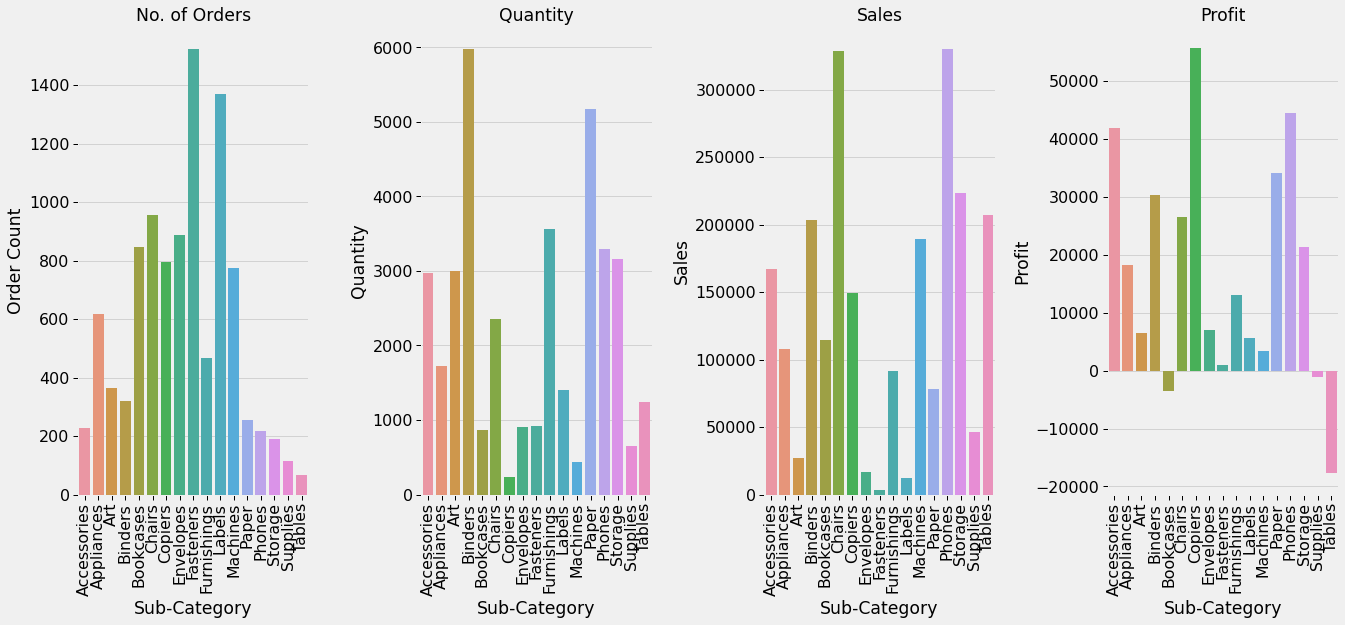

In [36]:
sub = data.groupby(["Sub-Category"])[["Quantity", "Sales", "Profit"]].sum()
sns.set_context("paper", font_scale=1.8)
draw(sub, "Sub-Category", 90)

### Observations
* Fasteners and Labels are most ordered products but they contribute very little to the sales even then they make a good profit (31% and 44% of total sales resp.) compared to products in machine category which have very small profit (1.7% on total sales).
* Chairs however have a good order count they produce most of the sales and make a very good profit as well.
* Binders have low order count but high quantity which means these are purchased in bulk and they are profitable as well.
* Accessories and Art have low order count, but a good quantity of these are sold and they make good profit too (appox. 25% of total sales). 
* Other Sub-Categories including Storage, Furnishings, and Appliances have good sales and are also quite profitable.
* Copiers are sold in low quantity but they add a lot to the sales which means copiers are expensive. They produce highest profit.
* Phones are second to copiers in the race of profit generation and the reason for this is the quantity of phones sold which is a lot higher in comparison to copiers.
* Envelopes are sold in low quantity thus have low sales but they generate 42.27% profit on total sales.
* Paper have low order count but high quantity which means these are purchased in bulk and about 43.39% of their total sales is profit.
* Bookcases and Supplies having decent sales but results in loss.
* Tables affect the profit in most negative way by losing about 8.5% of total sales.

## <div id="segment">3.Segment<div/> 

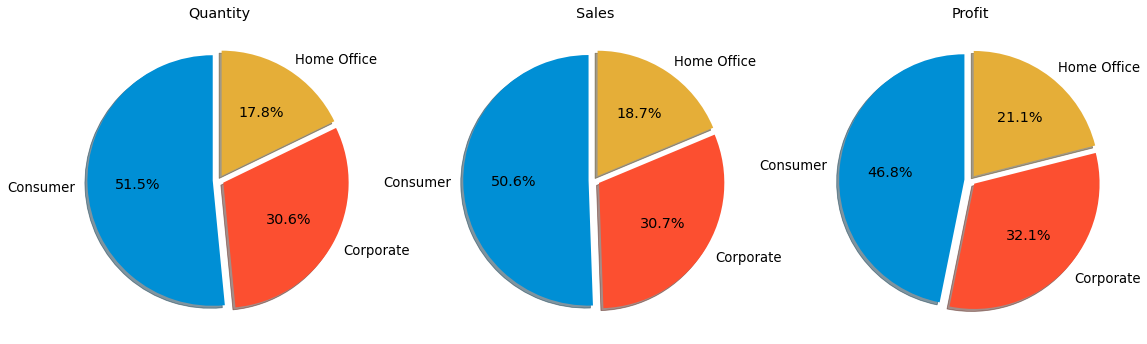

In [37]:
df = data.groupby(["Segment"])[["Quantity", "Sales", "Profit"]].sum()
explode = (0.05, 0.04, 0.04)
sns.set_context("paper", font_scale=1.5)
fig, axes = plt.subplots(1, 3, facecolor="white", figsize=(17, 8))
p1 = axes[1].pie(df.Sales, labels=data["Segment"].unique(),explode=explode,  autopct='%1.1f%%', 
              shadow=True, startangle=90)
axes[1].set_title("Sales")
p2 = axes[0].pie(df.Quantity, labels=data["Segment"].unique(),explode=explode,  autopct='%1.1f%%', 
              shadow=True, startangle=90)
axes[0].set_title("Quantity")
p3 = axes[2].pie(df.Profit, labels=data["Segment"].unique(),explode=explode,  autopct='%1.1f%%', 
              shadow=True, startangle=90)
axes[2].set_title("Profit")
# plt.tight_layout()
# plt.legend()
plt.show()

### Observations
50% of total customers belongs to Consumer Segment and are responsible for about half of the total sales and profit.
Home Office and Corporate Segment makes up the other half by producing 18.7% and 30.7% of sales and 21.1% and 32.1% of the profit respectively.

## <div id="ship">4. Ship Mode<div/> 

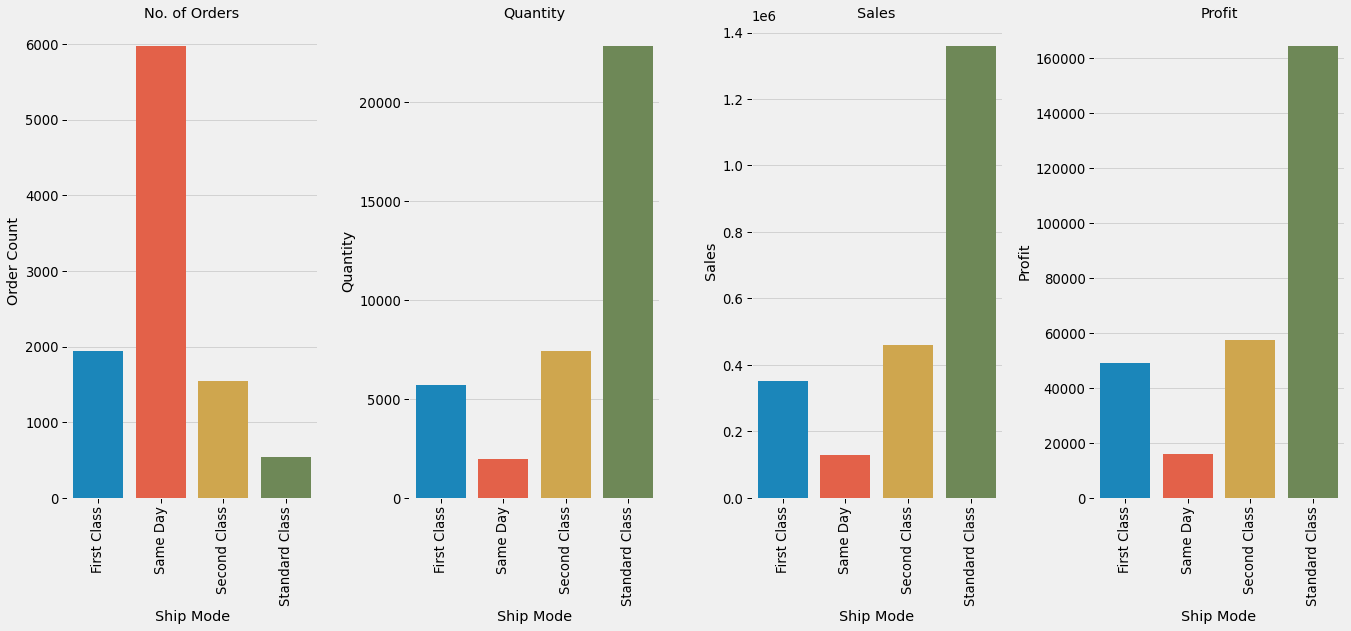

In [38]:
ship = data.groupby(["Ship Mode"])[["Quantity", "Sales", "Profit"]].sum()
draw(ship, "Ship Mode", 90)

### Observations
Customers prefer to place order for same day but same day delivery gets less profit which makes sense as it must be costly. The order of delivery preference goes First Class, Second Class and Standard Class at last and the profit made is in reverse order of delivery preference.

## <div id="quantity">5. Quantity of products purchased<div/> 

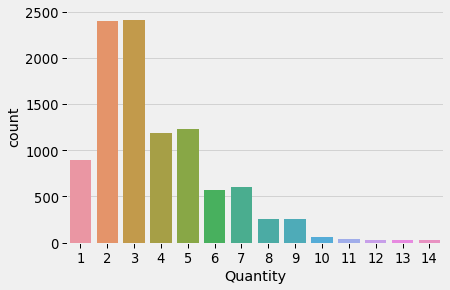

In [39]:
# df["avg_count"] = data["Quantity"]
amt = data.groupby(["Sub-Category"])["Quantity"].mean()
sns.countplot(x="Quantity", data=data);

### Observations
Products are more frequently bought in quantity of 2 or 3 per order. Quantity of 4 and 5 are also common.
Next is a single product.Quantity of 6 and 7 bought in case of some products and any quantity above 7 is rare.

## <div id="discount">6. Discount<div/> 

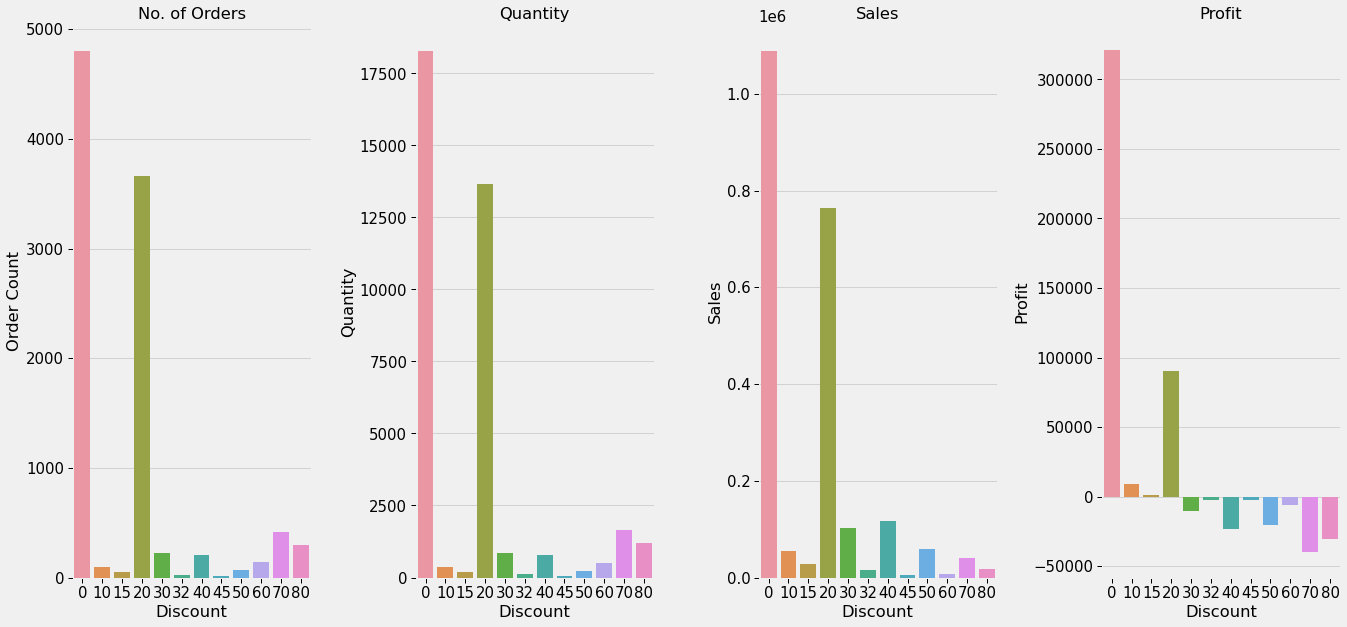

In [40]:
sns.set_context("paper", font_scale=1.7)
discount = data.groupby(["Discount"])[["Quantity", "Sales", "Profit"]].sum()
discount.index = (discount.index*100).astype("int64")
draw(discount, "Discount", 0)

### Observations
20 % discount shows the most effective results in terms of order count, quantity of products sold and the profit earned.
Other than that discount does not seem to work in our favor. Discount greater than 20 results in loss.<br>
In conclusion discount should be avoided whenever possible and if given it must not be greater than 20 % and 20 % percent is a sweet spot for discounts.  

## Areas to Improve
* Technological Products make great profit but these are not purchased by a lot of people. We should focus on spreading awareness of increasing technology among users with ads.
* Selling tables results in loss so we can either increase the price of table or we can sell it alongside other products such as chairs to cover up for the loss or both.Similarily smaller supplies should be sold in packs or as extra item with relevant products.
* Same Day shipping should be provided on a few selected more profitable products as they can cover up for the extra expenses.
* Most customers prefer to buy products in packs of 2 or 3 which costs a little less than when bought individually.
* 20 % discount works best for attracting customers as well as producing sales and profit.However it might not work for some products which are bought in less quantity.
